In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [134]:
df = pd.read_csv('drive/MyDrive/DS - Projects/Banking Churn Prediction/Churn_Modelling.csv')

In [135]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [136]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [137]:
df.shape

(10002, 14)

In [138]:
X = df.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)

In [139]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78


In [140]:
Y = df['Exited']
Y

0        1
1        0
2        1
3        0
4        0
        ..
9997     1
9998     1
9999     1
10000    0
10001    0
Name: Exited, Length: 10002, dtype: int64

In [141]:
X.isnull().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
dtype: int64

In [142]:
Y.isnull().sum()

0

In [143]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10002 entries, 0 to 10001
Series name: Exited
Non-Null Count  Dtype
--------------  -----
10002 non-null  int64
dtypes: int64(1)
memory usage: 78.3 KB


In [144]:
Y.value_counts()

0    7964
1    2038
Name: Exited, dtype: int64

In [145]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,test_size =0.2,random_state = 43, stratify = Y)

In [146]:
Y_Train.value_counts()

0    6371
1    1630
Name: Exited, dtype: int64

In [147]:
Y_Test.value_counts()

0    1593
1     408
Name: Exited, dtype: int64

In [148]:
X_Train['Geography'].value_counts()

France     4026
Germany    2012
Spain      1962
Name: Geography, dtype: int64

In [149]:
X_Train[X_Train['Geography'].isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6,822,NaN,Male,50.0,7,0.0,2,1.0,1.0,10062.8


In [150]:
X_Train['Geography']=X_Train['Geography'].fillna('France')

In [151]:
X_Train[X_Train['Geography'].isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary


In [152]:
X_Train['Age'].value_counts()

38.00    381
37.00    377
36.00    372
34.00    368
35.00    366
        ... 
88.00      1
83.00      1
80.00      1
36.44      1
81.00      1
Name: Age, Length: 72, dtype: int64

In [153]:
X_Train["Gender"].value_counts()

Male      4384
Female    3617
Name: Gender, dtype: int64

In [154]:
X_Train.groupby('Gender').mean()

<ipython-input-154-7240be7d97cc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  X_Train.groupby('Gender').mean()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Gender,,,,,,,,
Female,652.528338,39.290113,5.010782,74900.083915,1.547691,0.704093,0.507879,99639.048615
Male,650.177464,38.657242,5.050182,77163.395351,1.518476,0.711451,0.521898,99659.510342


In [155]:
X_Train[X_Train['Age'].isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73


In [156]:
X_Train['Age'].fillna(X_Train['Age'].mean(), inplace=True)

In [157]:
X_Train[X_Train['Age'].isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary


In [158]:
X_Train[X_Train['Balance']==134603.88]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9,684,France,Male,38.943379,2,134603.88,1,1.0,1.0,71725.73


In [159]:
X_Train[X_Train['HasCrCard'].isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.1


In [160]:
X_Train['HasCrCard'].value_counts()

1.0    5665
0.0    2335
Name: HasCrCard, dtype: int64

In [161]:
X_Train['HasCrCard'].value_counts(normalize=True)

1.0    0.708125
0.0    0.291875
Name: HasCrCard, dtype: float64

In [162]:
X_Train['HasCrCard']=X_Train['HasCrCard'].fillna(1)

In [163]:
X_Train[X_Train['HasCrCard'].isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary


In [164]:
X_Train[X_Train['IsActiveMember'].isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary


In [165]:
X_Train.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [166]:
X_Train = pd.get_dummies(X_Train, columns=['Gender','Geography'], prefix=['Gender','Geography'])
X_Train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
2971,681,30.0,2,111093.01,1,1.0,0.0,68985.99,0,1,0,0,1
2108,593,74.0,5,161434.36,2,1.0,1.0,65532.17,0,1,0,1,0
9035,535,45.0,2,0.00,2,1.0,0.0,125658.28,0,1,1,0,0
8528,534,35.0,4,0.00,2,0.0,0.0,9541.15,0,1,0,0,1
1678,570,18.0,4,82767.42,1,1.0,0.0,71811.90,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,718,36.0,9,0.00,1,1.0,0.0,45909.87,0,1,1,0,0
2525,505,34.0,10,104498.79,1,0.0,1.0,126451.14,0,1,1,0,0
4864,737,54.0,9,0.00,1,1.0,0.0,83470.40,0,1,1,0,0
892,577,42.0,9,0.00,1,1.0,0.0,74077.91,0,1,1,0,0


In [167]:
X_Test = pd.get_dummies(X_Test, columns=['Gender','Geography'], prefix=['Gender','Geography'])
X_Test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
7900,785,54.0,1,0.00,2,1.0,0.0,45113.92,1,0,0,0,1
5335,651,39.0,8,0.00,1,1.0,0.0,137452.57,1,0,1,0,0
2899,586,35.0,7,0.00,2,1.0,0.0,70760.69,1,0,1,0,0
3526,799,30.0,9,0.00,2,1.0,0.0,136827.96,1,0,1,0,0
595,611,41.0,2,114206.84,1,1.0,0.0,164061.60,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4852,687,35.0,3,0.00,2,1.0,1.0,176450.19,0,1,0,0,1
9120,703,58.0,4,92930.92,1,0.0,1.0,85148.78,0,1,0,0,1
2927,632,32.0,6,111589.33,1,1.0,1.0,170382.99,0,1,1,0,0
3531,408,84.0,8,87873.39,1,0.0,0.0,188484.52,1,0,1,0,0


In [168]:
Train_Data = pd.concat([X_Train,Y_Train],axis =1)
Train_Data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Exited
2971,681,30.0,2,111093.01,1,1.0,0.0,68985.99,0,1,0,0,1,0
2108,593,74.0,5,161434.36,2,1.0,1.0,65532.17,0,1,0,1,0,0
9035,535,45.0,2,0.00,2,1.0,0.0,125658.28,0,1,1,0,0,0
8528,534,35.0,4,0.00,2,0.0,0.0,9541.15,0,1,0,0,1,0
1678,570,18.0,4,82767.42,1,1.0,0.0,71811.90,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,718,36.0,9,0.00,1,1.0,0.0,45909.87,0,1,1,0,0,0
2525,505,34.0,10,104498.79,1,0.0,1.0,126451.14,0,1,1,0,0,0
4864,737,54.0,9,0.00,1,1.0,0.0,83470.40,0,1,1,0,0,1
892,577,42.0,9,0.00,1,1.0,0.0,74077.91,0,1,1,0,0,0


In [169]:
Train_Data_Cor =Train_Data.corr()

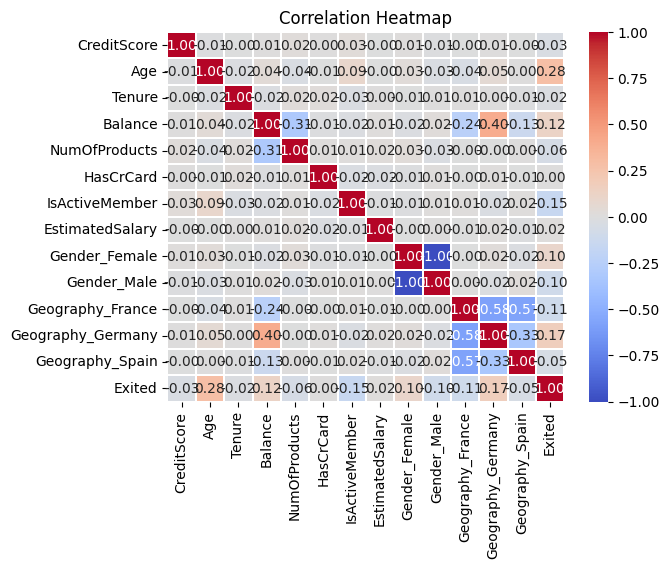

In [170]:
sns.heatmap(Train_Data_Cor, annot = True,cmap='coolwarm', fmt=".2f", linewidths=0.2)
plt.title('Correlation Heatmap')
plt.show()

In [202]:
from sklearn.linear_model import LinearRegression

In [203]:
lr_model = LinearRegression()

In [204]:
lr_model.fit(X_Train,Y_Train)

LinearRegression()

In [205]:
X_Test.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Gender_Female        0
Gender_Male          0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [206]:
X_Test.fillna(1, inplace = True)

In [207]:
y_pred = lr_model.predict(X_Test)

In [177]:
from sklearn.metrics import r2_score

In [208]:
acc=accuracy_score(Y_Test,y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [179]:
acc

0.16560816741177964

In [195]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [190]:
rf_classifier.fit(X_Train, Y_Train)

RandomForestClassifier(random_state=42)

In [192]:
y_pred1 = rf_classifier.predict(X_Test)


In [193]:
r2 = r2_score(Y_Test, y_pred1)

In [194]:
r2

0.17797994904176373

In [198]:
acc1=accuracy_score(Y_Test,y_pred1)

In [199]:
acc1

0.8665667166416792